In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve,balanced_accuracy_score,confusion_matrix

In [ ]:
train = pd.read_excel("diabetes_binary_health_indicators_BRFSS2015.xlsx")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
train

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age,Education,Income,PerfectHlth,NoHrtIssue,hlthNotGood,HlthAboveGood,hlthNotGood&DiffWalk,hbp&HA,older&poor
0,0,1,1,1,40,1,0,0,0,0,...,9,4,3,0,0,1,0,1,0,1
1,0,0,0,0,25,1,0,0,1,0,...,7,6,1,0,1,0,0,0,0,1
2,0,1,1,1,28,0,0,0,0,1,...,9,4,8,0,0,1,0,1,0,0
3,0,1,0,1,27,0,0,0,1,1,...,11,3,6,1,0,0,1,0,0,0
4,0,1,1,1,24,0,0,0,1,1,...,11,5,4,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,5,6,7,0,0,0,0,0,0,0
253676,1,1,1,1,18,0,0,0,0,0,...,11,2,4,0,0,1,0,1,0,1
253677,0,0,0,1,28,0,0,0,1,1,...,2,5,2,1,1,0,1,0,0,0
253678,0,1,0,1,23,0,0,0,0,1,...,7,5,1,0,0,0,0,0,0,1


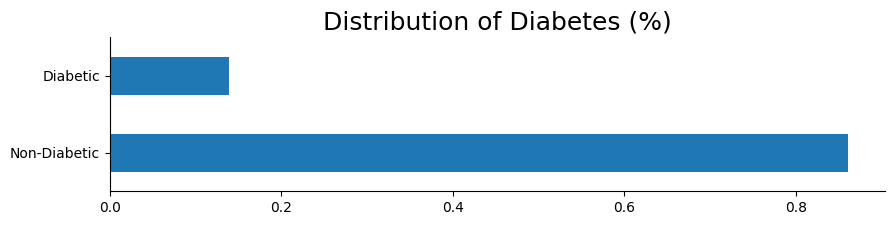

In [ ]:
train["Diabetes_binary"].value_counts(normalize=True)*100

train["Diabetes_binary"].value_counts(1).plot(kind = 'barh',figsize=(10,2)).spines[['top','right']].set_visible(False);
plt.title("Distribution of Diabetes (%)", fontsize = 18)
plt.yticks(ticks= [0,1], labels = ["Non-Diabetic","Diabetic"]);

In [ ]:
train[train["Diabetes_binary"]==1.0]['Sex'].value_counts(1)*100

0    52.087931
1    47.912069
Name: Sex, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==0.0]['Sex'].value_counts(1)*100

0    56.593568
1    43.406432
Name: Sex, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==1.0].Education.value_counts(1)*100

4    31.307644
6    29.423414
5    29.293272
3     6.495785
2     3.346913
1     0.132971
Name: Education, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==0.0].Education.value_counts(1)*100

6    44.392994
5    27.277474
4    23.671989
3     3.289456
2     1.309920
1     0.058168
Name: Education, dtype: float64

In [ ]:
age_dist = train[train["Diabetes_binary"]==1.0].Age.value_counts(1)*100

<ipython-input-78-9053f0985037>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 90);


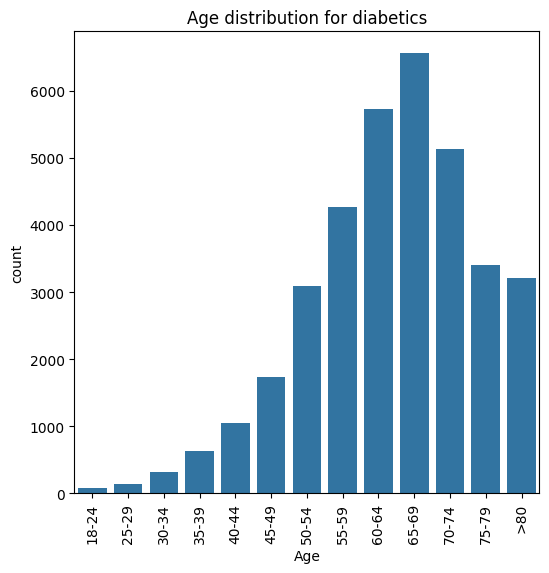

In [ ]:
ax = sns.countplot(train[train['Diabetes_binary']==1.0],x = 'Age')
ax.set(title = "Age distribution for diabetics")
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 90);

In [ ]:
age_dist.head(8).sum()

93.75035364680585

In [ ]:
age_dist2 = (train[train["Diabetes_binary"]==0.0].Age.value_counts(1)
             .to_frame()
             .reset_index()
             .rename(columns={'index': 'Age', 'Age': 'Percentage'}))

In [ ]:
age_dist2[age_dist2["Age"]>6].Percentage.sum()*100

67.81582346313446

<ipython-input-128-d0cf83520806>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 80);


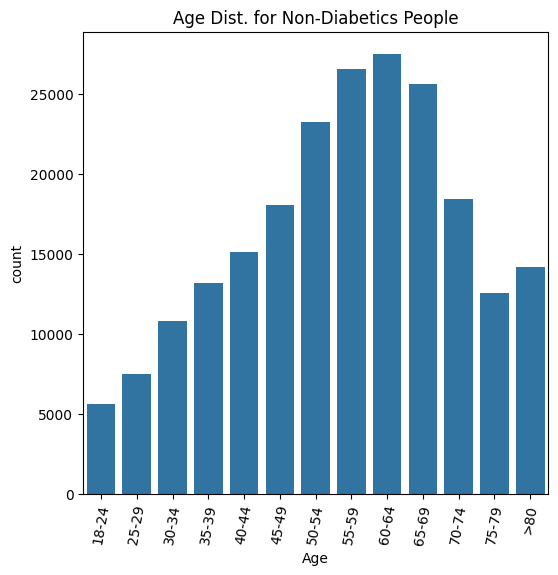

In [ ]:
ax = sns.countplot(data = train[train["Diabetes_binary"]==0.0],x = "Age")
ax.set(title ="Age Dist. for Non-Diabetics People")
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'],rotation = 80);


#**HIGHBP**
\

In [ ]:
train[train["Diabetes_binary"]==1.0].HighBP.value_counts(1)*100

1    75.267357
0    24.732643
Name: HighBP, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==0.0].HighBP.value_counts(1)*100

0    62.33981
1    37.66019
Name: HighBP, dtype: float64

#**High Cholestrol**

In [ ]:
train[train["Diabetes_binary"]==1.0].HighChol.value_counts(1)*100

1    67.011826
0    32.988174
Name: HighChol, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==0.0].HighChol.value_counts(1)*100

0    61.570346
1    38.429654
Name: HighChol, dtype: float64

#**Heart Disease or Heart Attack**

In [ ]:
train[train["Diabetes_binary"]==1.0].HeartDiseaseorAttack.value_counts(1)*100

0    77.711764
1    22.288236
Name: HeartDiseaseorAttack, dtype: float64

In [ ]:
train[train["Diabetes_binary"]==0.0].HeartDiseaseorAttack.value_counts(1)*100

0    92.664908
1     7.335092
Name: HeartDiseaseorAttack, dtype: float64

#**Stroke**

In [ ]:
train[train['Diabetes_binary']==1.0].Stroke.value_counts(normalize=True)*100

0    90.754258
1     9.245742
Name: Stroke, dtype: float64

In [ ]:
train[train['Diabetes_binary']==0.0].Stroke.value_counts(normalize=True)*100

0    96.782911
1     3.217089
Name: Stroke, dtype: float64

#**BMI**

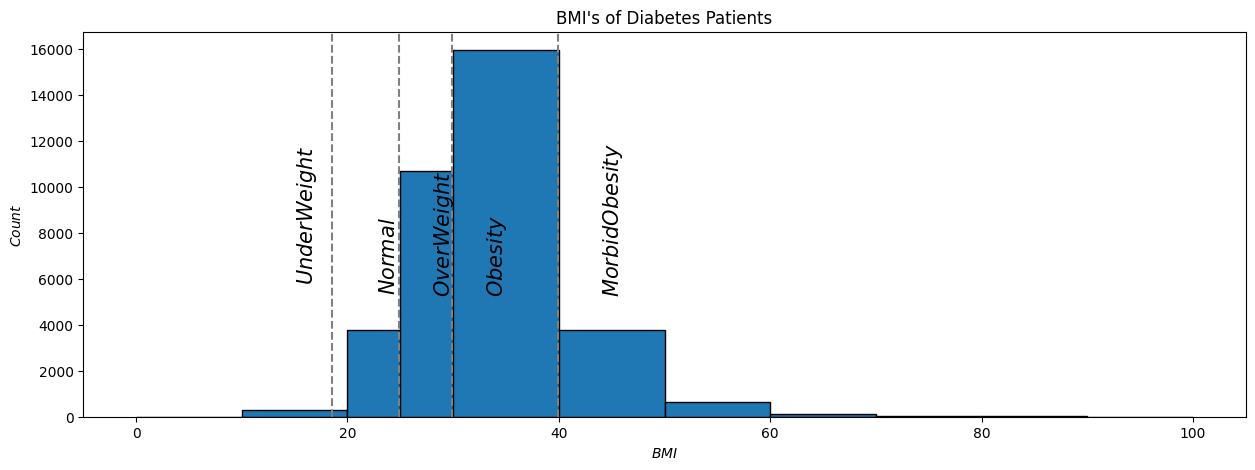

In [ ]:
# plotting lines
plt.axvline(18.5 , color = 'gray',linestyle = "--")
plt.axvline(24.9,color = 'gray',linestyle = "--")
plt.axvline(29.9,color = 'gray', linestyle = "--")
plt.axvline(39.9, color = 'gray', linestyle = "--")

# add text
plt.text(15,6000,"$Under Weight$", rotation = 90, size = 15)
plt.text(23, 5500 , "$Normal$",rotation = 90 , size = 15)
plt.text(28 , 5500  , "$OverWeight$",rotation = 90, size = 15)
plt.text(33, 5500 ,"$Obesity$" , rotation = 90, size = 15)
plt.text(44, 5500 , "$Morbid Obesity$", rotation = 90, size = 15)

plt.hist(train[train["Diabetes_binary"]==1.0].BMI,edgecolor = "black",bins = [0,10,20,25,30,40,50,60,70,80,90,100])
plt.xlabel("$BMI$")
plt.ylabel("$Count$")
plt.title("BMI's of Diabetes Patients")
plt.rcParams["figure.figsize"] = (15,5)


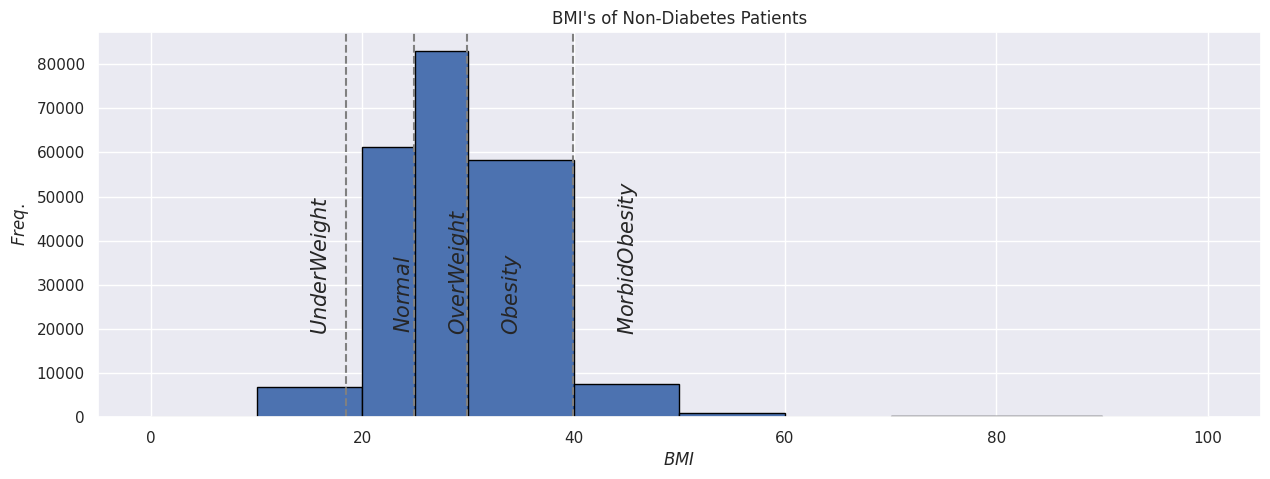

In [ ]:
plt.axvline(18.5,color = "gray",linestyle = "--")
plt.axvline(24.9, color = "gray",linestyle = "--")
plt.axvline(29.9,  color = "gray",linestyle = "--")
plt.axvline(39.9, color = "gray",linestyle = "--")

# add text
plt.text(15,20000, "$UnderWeight$", rotation = 90 , size = 15)
plt.text(23,20000, "$Normal$", rotation = 90 , size = 15)
plt.text(28,20000, "$OverWeight$", rotation = 90 , size = 15)
plt.text(33,20000, "$Obesity$", rotation = 90 , size = 15)
plt.text(44,20000, "$MorbidObesity$", rotation = 90 , size = 15)

plt.hist(train[train["Diabetes_binary"]==0.0].BMI , edgecolor = 'black',bins = [0,10,20,25,30,40,50,60,70,80,90,100])
plt.xlabel("$BMI$")
plt.ylabel("$Freq.$")
plt.title("BMI's of Non-Diabetes Patients")
plt.rcParams["figure.figsize"] = (15,5)

In [ ]:
train.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

#**feature_engineering**

In [ ]:
# Hasn't fallen sick in the last 30 days and feels excellent or very good
train['PerfectHlth'] = (train['PhysHlth']==0.0) & (train['GenHlth']<3.0)
train['PerfectHlth'] = train['PerfectHlth'].astype(int)

In [ ]:
# No single issue with heart disease or BP

train['NoHrtIssue'] = (train['HighBP']==0.0) & (train['HighChol']==0.0) & (train['HeartDiseaseorAttack']==0.0)
train['NoHrtIssue'] = train['NoHrtIssue'].astype(int)

In [ ]:
# Diabetics would most likely feel unwell and in a slightly poorer state of health

train['hlthNotGood'] = train['GenHlth'] > 3
train['HlthAboveGood'] = train['GenHlth'] < 3
train['hlthNotGood'] = train['hlthNotGood'].astype(int)
train['HlthAboveGood'] = train['HlthAboveGood'].astype(int)

In [ ]:
#unwell & difficulty walking because of low or excess sugar(check to confirm)
train['hlthNotGood&DiffWalk'] = (train['GenHlth'] > 3.0) & (train['DiffWalk']==1.0)
train['hlthNotGood&DiffWalk'] = train['hlthNotGood&DiffWalk'].astype(int)

In [ ]:
# Type 2 diabetes being age-related: people with high blood pressure and heart disease/illness(more prevalent with aging)

train['hbp&HA'] = (train['HeartDiseaseorAttack'] == 1.0) & (train['HighBP'] == 1.0)
train['hbp&HA'] = train['hbp&HA'].astype(int)
train['hbp&HA'].value_counts()

0    235752
1     17928
Name: hbp&HA, dtype: int64

In [ ]:
train['older&poor'] = (train['Age'] > 5.0) & (train['Income'] < 5)
train['older&poor'] = train['older&poor'].astype(int)
train['older&poor'].value_counts()

0    206599
1     47081
Name: older&poor, dtype: int64

#**Plotting the correlation**

#**Correlation of each feature to Diabetes(-ve correlation to diabetes implies +ve correlation to being non-diabetic)**

In [ ]:
correlation = train.corr(numeric_only = True)


In [ ]:
correlation["Diabetes_binary"].sort_values(ascending = False)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
hlthNotGood             0.249898
DiffWalk                0.218344
BMI                     0.216843
hlthNotGood&DiffWalk    0.211009
HighChol                0.200276
hbp&HA                  0.185759
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
older&poor              0.166253
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
PerfectHlth            -0.206849
NoHrtIssue             -0.234274
HlthAboveGood          -0.255507
Name: Diabetes_binary, dtype: float64

<Axes: title={'center': 'Correlation to diabetes'}>

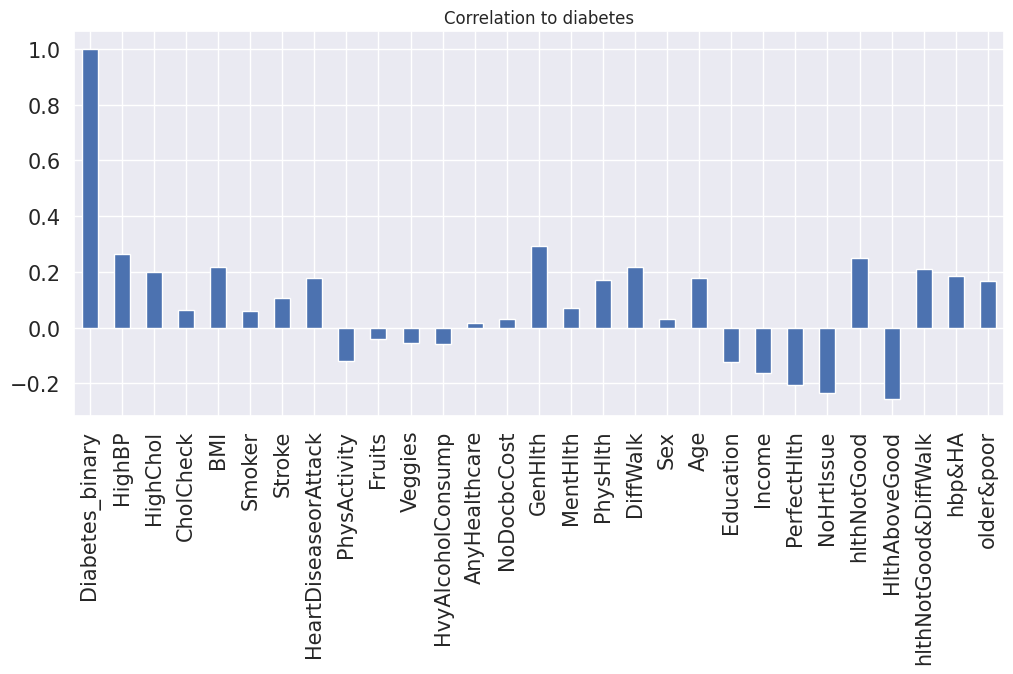

In [ ]:
sns.set(color_codes = True)
train.corrwith(train.Diabetes_binary).plot(kind = "bar",figsize = (12,5), title = "Correlation to diabetes",fontsize = 15 , rot = 90, grid = True)

#**Data Preparation**

In [ ]:
train2 = train.drop(['Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'Income',
              'Education', 'CholCheck'],axis=1)

In [ ]:
train3 = train2.copy()

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'PerfectHlth',
       'NoHrtIssue', 'hlthNotGood', 'HlthAboveGood', 'hbp&HA', 'older&poor',
       'hlthNotGood&DiffWalk'],
      dtype='object')

In [ ]:
# cat_features = [i for i in train3.columns if  ]

In [ ]:
train3.duplicated().sum()

85170

In [ ]:
train3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
253675    False
253676    False
253677     True
253678    False
253679    False
Length: 253680, dtype: bool

In [ ]:
train3.drop_duplicates()

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,...,DiffWalk,Sex,Age,PerfectHlth,NoHrtIssue,hlthNotGood,HlthAboveGood,hlthNotGood&DiffWalk,hbp&HA,older&poor
0,0,1,1,40,1,0,0,0,0,5,...,1,0,9,0,0,1,0,1,0,1
1,0,0,0,25,1,0,0,1,0,3,...,0,0,7,0,1,0,0,0,0,1
2,0,1,1,28,0,0,0,0,0,5,...,1,0,9,0,0,1,0,1,0,0
3,0,1,0,27,0,0,0,1,0,2,...,0,0,11,1,0,0,1,0,0,0
4,0,1,1,24,0,0,0,1,0,2,...,0,0,11,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0,1,0,42,0,0,0,1,0,3,...,0,1,3,0,0,0,0,0,0,0
253675,0,1,1,45,0,0,0,0,0,3,...,0,1,5,0,0,0,0,0,0,0
253676,1,1,1,18,0,0,0,0,0,4,...,1,0,11,0,0,1,0,1,0,1
253678,0,1,0,23,0,0,0,0,0,3,...,0,1,7,0,0,0,0,0,0,1


In [ ]:
train3["Diabetes_binary"].value_counts(1)*100

0    86.066698
1    13.933302
Name: Diabetes_binary, dtype: float64

In [ ]:
X = train3.drop(["Diabetes_binary"],axis = 1)
y = train3.Diabetes_binary

<Axes: ylabel='Diabetes_binary'>

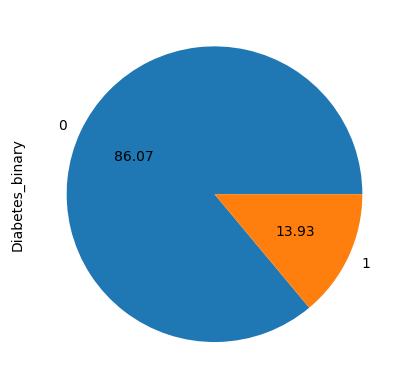

In [ ]:
y.value_counts().plot(kind = "pie",autopct = '%.2f')

#**Using Oversampling**

In [ ]:
OverS = RandomOverSampler(random_state = 42 , sampling_strategy = 'not majority')
X_over , y_over = OverS.fit_resample(X,y)

In [ ]:
X_over_train, X_over_test , y_over_train , y_over_test = train_test_split(X_over, y_over, random_state = 42 , test_size = 0.2)

In [ ]:
X_over

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,...,DiffWalk,Sex,Age,PerfectHlth,NoHrtIssue,hlthNotGood,HlthAboveGood,hlthNotGood&DiffWalk,hbp&HA,older&poor
0,1,1,40,1,0,0,0,0,5,18,...,1,0,9,0,0,1,0,1,0,1
1,0,0,25,1,0,0,1,0,3,0,...,0,0,7,0,1,0,0,0,0,1
2,1,1,28,0,0,0,0,0,5,30,...,1,0,9,0,0,1,0,1,0,0
3,1,0,27,0,0,0,1,0,2,0,...,0,0,11,1,0,0,1,0,0,0
4,1,1,24,0,0,0,1,0,2,3,...,0,0,11,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436663,1,1,28,0,0,1,1,0,5,2,...,1,0,8,0,0,1,0,1,1,1
436664,1,1,30,1,1,1,0,0,4,30,...,1,0,12,0,0,1,0,1,1,1
436665,1,1,36,0,1,1,0,0,2,0,...,1,0,10,0,0,0,1,0,1,0
436666,1,1,30,0,0,0,0,0,4,15,...,1,1,7,0,0,1,0,1,0,0


#**Modelling**

In [ ]:
def train_eval_model(predictions , y_test):
  '''
  This is a function to return our model performance metrics.
  '''
  accuracy = accuracy_score(y_test , predictions)
  f1 = f1_score(y_test , predictions , average = 'micro')
  precision = precision_score(y_test, predictions, average = 'micro')
  recall = recall_score(y_test, predictions , average = 'micro')
  balanced_accuracy = balanced_accuracy_score(y_test , predictions)
  auc = roc_auc_score(y_test, predictions)

  # dataframe for results
  eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]],columns = ["accuracy","f1_score","precision","recall","balanced_accuracy","auc"])
  return eval_df


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree = dtree.fit(X_over_train, y_over_train)
DecisionTree_over_predicted = dtree.predict(X_over_test)

In [ ]:
results = train_eval_model(DecisionTree_over_predicted , y_over_test)
results.index = ["DecisionTree-Oversampling"]
results

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
DecisionTree-Oversampling,0.889894,0.889894,0.889894,0.889894,0.890036,0.890036


In [ ]:
print("Decision-Tree")
print(classification_report(y_over_test , DecisionTree_over_predicted,target_names = ["non-diabetic","diabetic"]))

Decision-Tree
              precision    recall  f1-score   support

non-diabetic       0.94      0.83      0.88     43773
    diabetic       0.85      0.95      0.90     43561

    accuracy                           0.89     87334
   macro avg       0.90      0.89      0.89     87334
weighted avg       0.90      0.89      0.89     87334



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators' : [50, 100, 200, 300],
    'max_depth' : [5,10,15,20]
}
RF_grid_search_ = GridSearchCV(rfc , param_grid = param_grid , cv = 3 , verbose = 3, n_jobs = -1)
RF_grid_search_.fit(X_over_train, y_over_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

In [ ]:
RF_grid_search_.best_params_

{'max_depth': 20, 'n_estimators': 200}

In [ ]:
RF_grid_search_.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200)

In [ ]:
RF_tuned = RandomForestClassifier(n_estimators = 200 , max_depth = 20)
RF_tuned.fit(X_over_train, y_over_train)
RF_tuned_pred = RF_tuned.predict(X_over_test)
RF_tuned_score = train_eval_model(RF_tuned_pred , y_over_test)
RF_tuned_score.index = ["Random-Forest_Tuned"]


In [ ]:
RF_tuned_score

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
Random-Forest_Tuned,0.874184,0.874184,0.874184,0.874184,0.874323,0.874323


In [ ]:
print("random_forest_tuned")
print(classification_report(y_over_test , RF_tuned_pred, target_names = ["non-diabetic","diabetic"]))

random_forest_tuned
              precision    recall  f1-score   support

non-diabetic       0.92      0.82      0.87     43773
    diabetic       0.84      0.93      0.88     43561

    accuracy                           0.87     87334
   macro avg       0.88      0.87      0.87     87334
weighted avg       0.88      0.87      0.87     87334



In [ ]:
# without parameters
rfc.fit(X_over_train, y_over_train)
rfc_preds = rfc.predict(X_over_test)
print(classification_report(y_over_test , rfc_preds , target_names = ["non-diabetic", "diabetic"]))

              precision    recall  f1-score   support

non-diabetic       0.95      0.85      0.90     43773
    diabetic       0.86      0.95      0.91     43561

    accuracy                           0.90     87334
   macro avg       0.91      0.90      0.90     87334
weighted avg       0.91      0.90      0.90     87334



In [ ]:
rfc.feature_importances_

array([0.06233172, 0.02664554, 0.23283699, 0.027313  , 0.01109508,
       0.00828162, 0.02358247, 0.01008173, 0.06270128, 0.07927826,
       0.09513125, 0.01690304, 0.02486934, 0.15542126, 0.02247644,
       0.04231943, 0.02179122, 0.04574297, 0.00455023, 0.00607967,
       0.02056746])

In [ ]:
for name , score in zip(X_over, rfc.feature_importances_):
  print(name ,score)

HighBP 0.062331716879755084
HighChol 0.026645539479526234
BMI 0.23283699212383738
Smoker 0.027312998181279736
Stroke 0.011095083462878696
HeartDiseaseorAttack 0.008281622455863235
PhysActivity 0.023582469794886984
HvyAlcoholConsump 0.010081729913783562
GenHlth 0.06270127502994752
MentHlth 0.07927826007738777
PhysHlth 0.09513125389651003
DiffWalk 0.0169030440872008
Sex 0.02486933530386608
Age 0.1554212608913613
PerfectHlth 0.02247644457336076
NoHrtIssue 0.042319434403225775
hlthNotGood 0.021791223971030407
HlthAboveGood 0.045742965571869174
hlthNotGood&DiffWalk 0.004550226000201125
hbp&HA 0.006079668061196459
older&poor 0.020567455841031874


In [ ]:
rfc_score = train_eval_model(rfc_preds , y_over_test)
rfc_score.index = ["random forest no hyperparam . oversampled"]
rfc_score

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
random forest no hyperparam . oversampled,0.900623,0.900623,0.900623,0.900623,0.900751,0.900751


In [ ]:
from xgboost import XGBClassifier
xgb_over = XGBClassifier(learning_rate = 0.1)
xgb_over.fit(X_over_train,y_over_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_over_pred = xgb_over.predict(X_over_test)
xgb_preds = train_eval_model(xgb_over_pred, y_over_test)
xgb_preds.index = ["xgboost - oversampled"]
xgb_preds

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
xgboost - oversampled,0.7592,0.7592,0.7592,0.7592,0.759316,0.759316


In [ ]:
pred_df = pd.concat([results, RF_tuned_score, xgb_preds , rfc_score],axis = 0)


In [ ]:
pred_df.style.background_gradient(cmap = sns.color_palette("Greens", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
DecisionTree-Oversampling,0.889894,0.889894,0.889894,0.889894,0.890036,0.890036
Random-Forest_Tuned,0.874184,0.874184,0.874184,0.874184,0.874323,0.874323
xgboost - oversampled,0.759200,0.759200,0.759200,0.759200,0.759316,0.759316
random forest no hyperparam . oversampled,0.900623,0.900623,0.900623,0.900623,0.900751,0.900751


Conclusion The features that correlated with the target are: HighBP, HighChol, BMI, HlthAboveGood,hlthNotGood&DiffWalk, hbp&HA, older&poor, HeartDiseaseorAttack, PhysActivity,enHlth, PhysHlth, DiffWalk, Age

The model with best performance is the Random Forest Model with Random Overrsampling.

Our best model performance has 0.90 Accuracy with recall of 0.95 for the diabetic class